In [3]:
from LevyPlot import Scan2D
from LevyPlot import Scan3D
from LevyPlot import ProcessandPlot

In [4]:
import os
import shutil
import re
import math
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = "notebook"
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'Arial',
        'size'   : 14}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 0.8
matplotlib.rcParams["figure.dpi"] = 600

from scipy import signal
from scipy.optimize import curve_fit
from scipy import polyfit
import random

import json
from nptdms import TdmsWriter, RootObject, GroupObject, ChannelObject, TdmsFile
from tqdm import tqdm
from datetime import datetime
import pickle
from sklearn.cluster import KMeans

# Read Tdms File
## specify measurement parameters, create scan2D object
## set outersweepchannel to  'datapoint' for 1D scan data

In [5]:
experiment = Scan2D(folder = '00-cooldown',
                    metadata = dict(scantype = 'Conductance',
                                    groupsize = 1,
                                    monodirection = 'all',
                                    convertfilename = False,
                                    convertparam = dict(start = 0,
                                                        step = 1),
                                    dataofinterest = ['Magnet', 'Temperature', 'X4', 'X7', 'X2', 'X6'],
#                                     outmostsweepchannel = 'Temperature',
                                    outersweepchannel = 'datapoint',
                                    innersweepchannel = 'Temperature',
                                    source = 'X4',
                                    sourceamp = 0.025,
                                    Vplus = 'X2',
                                    Vminus = 'X2',
                                    Iminus = 'X7'))

## open tdms

In [6]:
experiment.openTdms()

## Convert the tdms file to Pandas Dataframe

In [ ]:
experiment.tdmsToAveragedMonoDfConcatenated()

In [8]:
experiment.monodfconcatenated

,Magnet,Temperature,X4,X7,X2,X6,V2T,V4T,R2T,G2T,R4T,G4T
datapoint,,,,,,,,,,,,
17662.0,-0.000009,0.049949,8.576799e-07,7.707221e-07,7.540272e-09,-7.461397e-09,0.025,7.540272e-09,32437.112964,0.000031,0.009783,102.214095
17660.0,-0.000009,0.049990,1.016509e-06,4.930086e-07,7.548105e-09,-7.478111e-09,0.025,7.548105e-09,50709.053436,0.000020,0.015310,65.315551
17659.0,-0.000009,0.050011,7.637419e-07,5.177863e-07,7.510632e-09,-7.447298e-09,0.025,7.510632e-09,48282.463018,0.000021,0.014505,68.940450
17658.0,-0.000009,0.050029,5.520979e-07,3.930095e-07,7.540976e-09,-7.489220e-09,0.025,7.540976e-09,63611.701888,0.000016,0.019188,52.116522
17655.0,-0.000009,0.049986,8.436108e-07,4.769025e-07,7.528149e-09,-7.464778e-09,0.025,7.528149e-09,52421.621565,0.000019,0.015786,63.349229
17653.0,-0.000009,0.050002,7.933200e-07,6.541215e-07,7.545033e-09,-7.463891e-09,0.025,7.545033e-09,38219.197072,0.000026,0.011535,86.695646
17650.0,-0.000009,0.049986,9.135718e-07,4.107471e-07,7.549311e-09,-7.483682e-09,0.025,7.549311e-09,60864.708927,0.000016,0.018379,54.408551
17648.0,-0.000009,0.049976,9.087921e-07,4.947081e-07,7.532163e-09,-7.463641e-09,0.025,7.532163e-09,50534.850574,0.000020,0.015225,65.679425
17646.0,-0.000009,0.049988,8.553957e-07,4.727235e-07,7.560808e-09,-7.441875e-09,0.025,7.560808e-09,52885.042721,0.000019,0.015994,62.522876


# Plot

(0, 2)

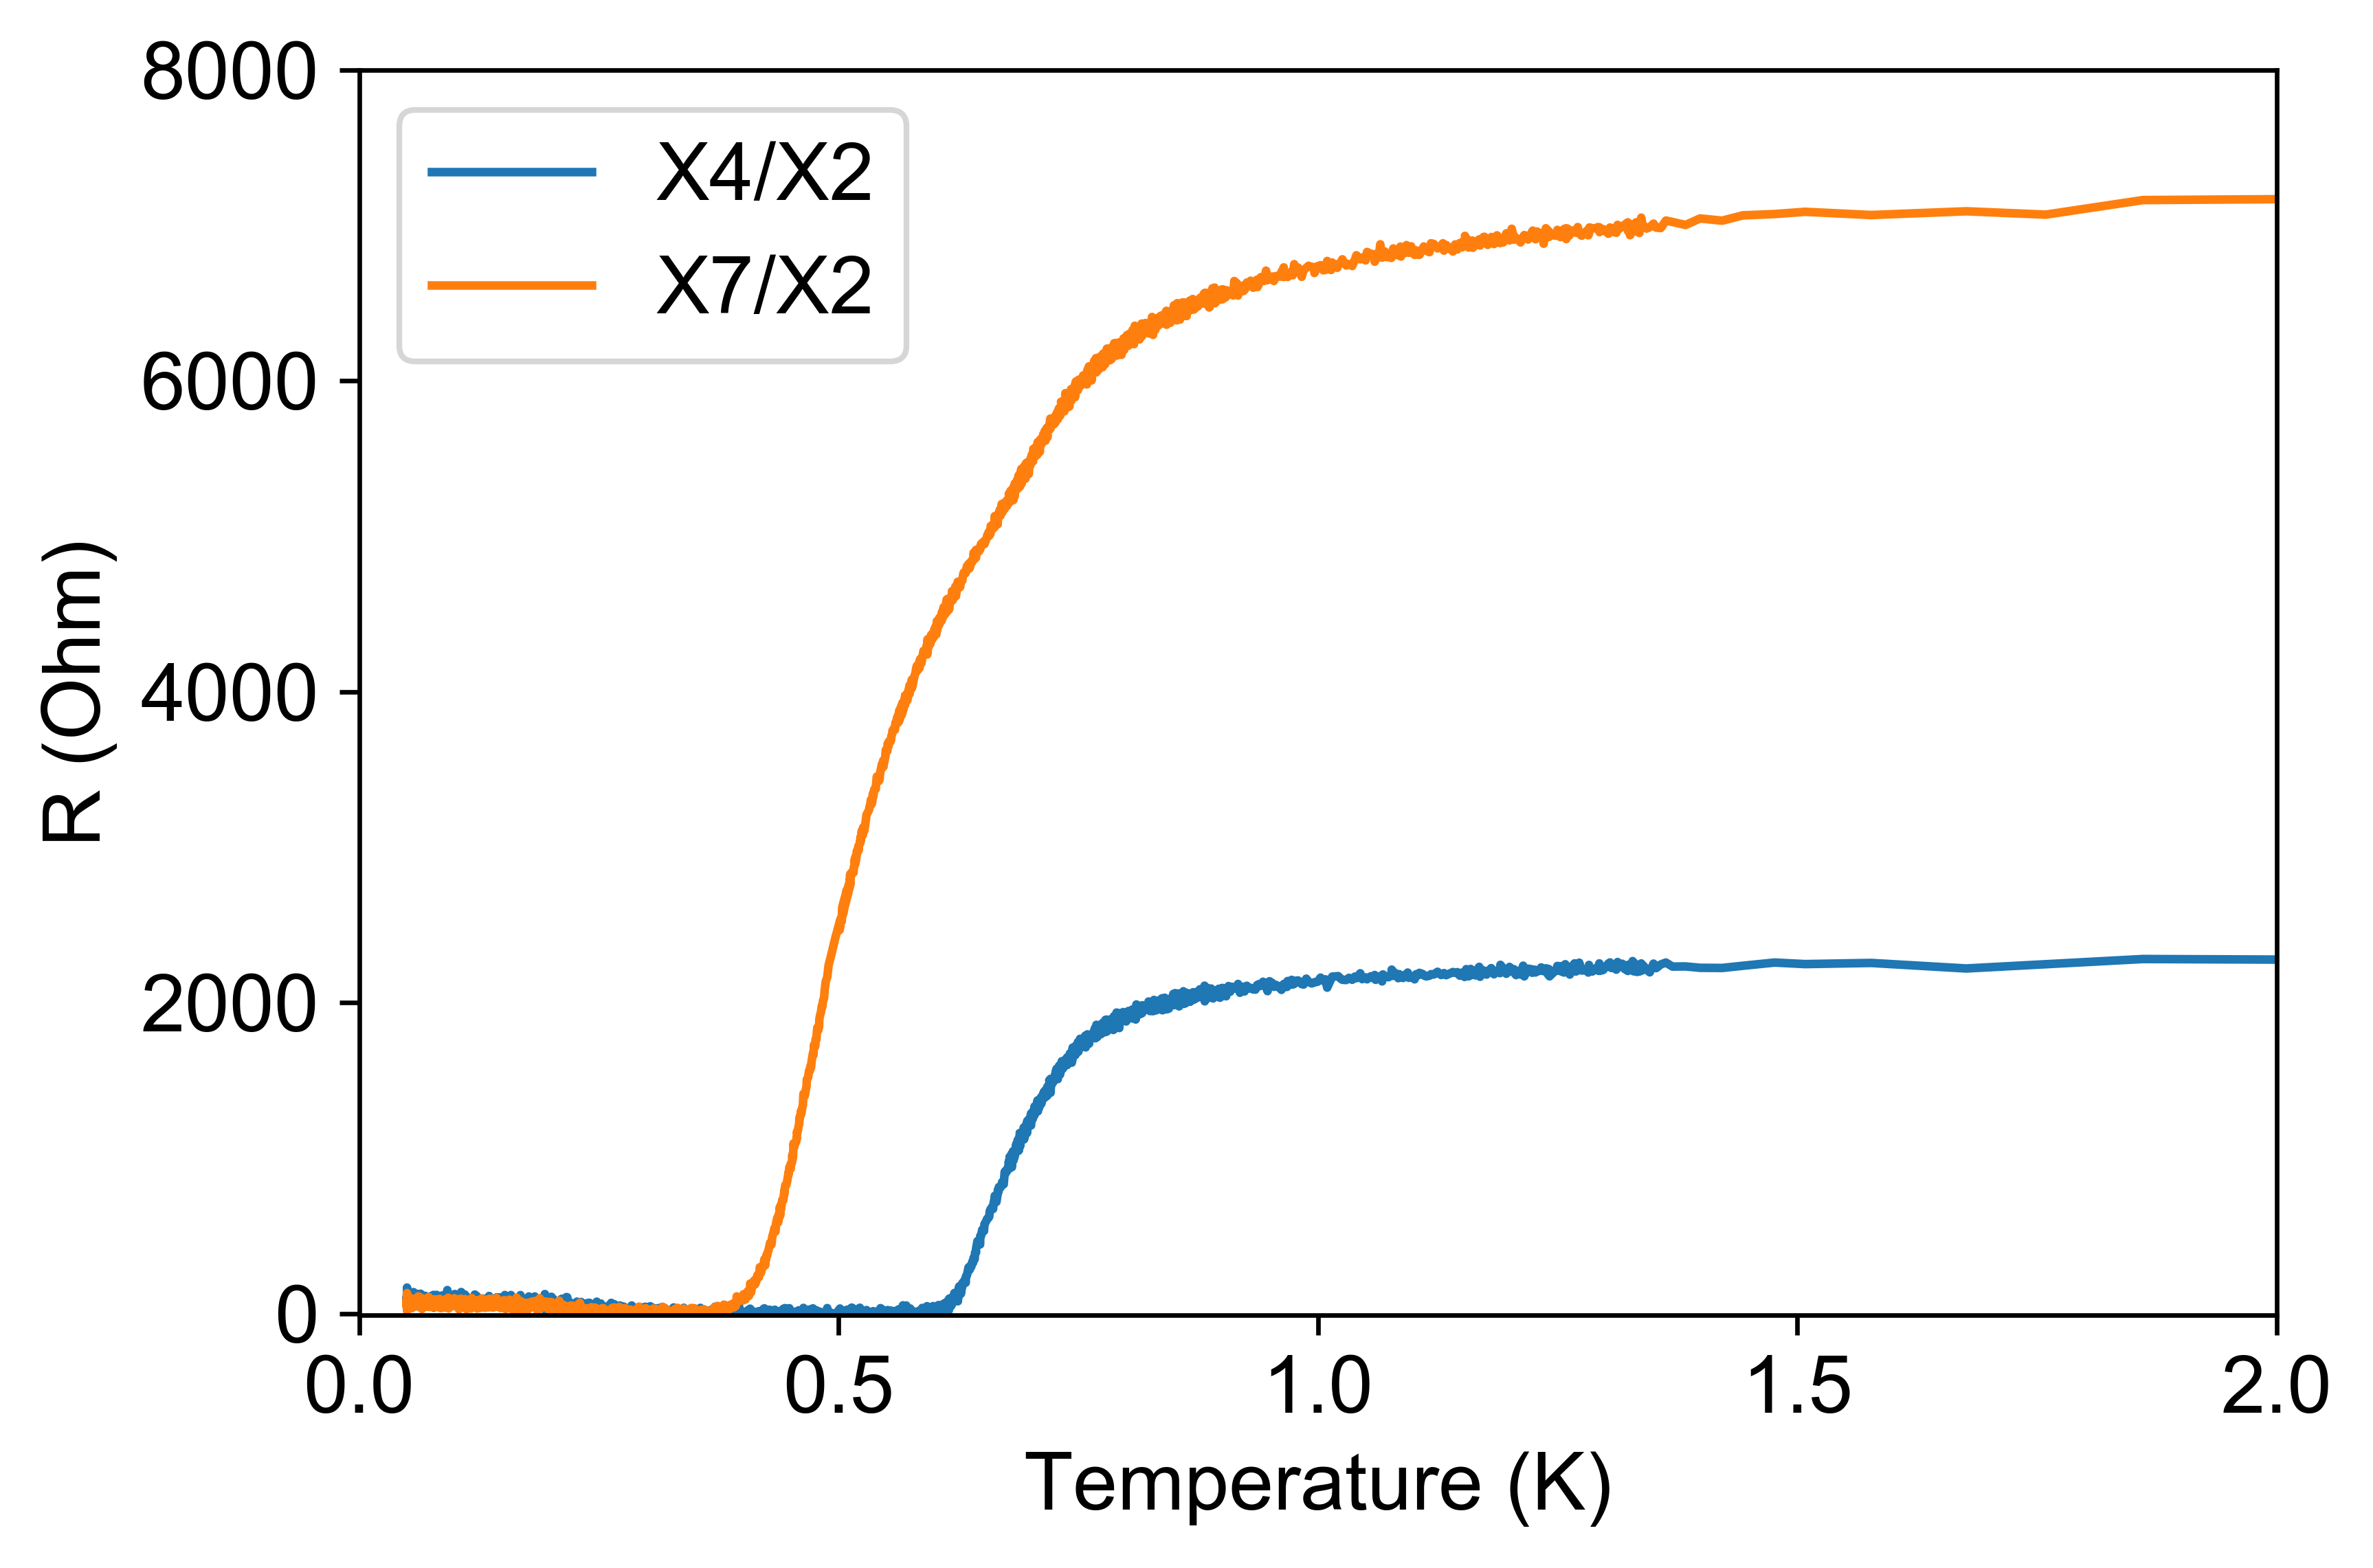

In [15]:
plt.plot(experiment.monodfconcatenated.Temperature, experiment.monodfconcatenated.X4\
        /experiment.monodfconcatenated.X2)
plt.plot(experiment.monodfconcatenated.Temperature, experiment.monodfconcatenated.X7\
        /experiment.monodfconcatenated.X2)
plt.legend(['X4/X2', 'X7/X2'])
plt.xlabel('Temperature (K)')
plt.ylabel('R (Ohm)')
plt.ylim(-10, 8000)
plt.xlim(0, 2)
# plt.hlines([2650], xmin = 0, xmax=2)

## save the scan2D object to pickle file

In [ ]:
experiment.saveToPickles()